
# Project: Investigate Dataset (TMDB-Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data is a collection of information for about 10 thousands of movies that were released over the past few years, such as (budget, company, cast, vote_count, vote_average, release_year, etc...)
>
> 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import squarify
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [33]:
#read the data file into a Dataframe
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


• Number of rows and columns

In [34]:
df.shape

(10866, 21)

• Checking on null values and datatypes of the attributes

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [36]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning

Removing duplicates

In [37]:
#Check for duplicates
df.duplicated().sum()

1

In [38]:
#Dropping that duplicated row
df.drop_duplicates(inplace=True)

#now checking
df.duplicated().sum()

0

In [39]:
#reading the columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Now dropping the unneeded columns

In [40]:
df.drop(['imdb_id', 'overview', 'budget', 'homepage', 'revenue', 'tagline', 'keywords'], axis=1, inplace=True)

After reading a document about the data the (budget_adj) and (revenue_adj) are the adjustments for the values but, in terms of 2010 dollars so that, they will be much more accurate in comparisons and anaylsis.

Also, for (the imdb_id, homepage, keywords, overview and tagline) all of these are unique values to each row so the won't be usful in comparisons

In [41]:
#Renaming the columns after dropping the unneeded ones
df.rename(columns={'budget_adj': 'budget', 'revenue_adj': 'revenue'}, inplace=True)
#Checking on data
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now Checking on data with null values

In [42]:
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget                     0
revenue                    0
dtype: int64

As shown there is 1030 movie with missing production company's name cause of that they won't be fully usful in analysis so we will drop them

In [43]:
#Drop null valued rows
df.dropna(inplace=True)
#Checking on data rows
df.shape

(9772, 14)

Dropping the outliers

In [44]:
#Dropping the outliers in budget and revenue
df.drop(df[df['budget'] == 0].index, inplace=True)
df.drop(df[df['revenue'] == 0].index, inplace=True)

Finally fixing data types

In [45]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3805 non-null   int64         
 1   popularity            3805 non-null   float64       
 2   original_title        3805 non-null   object        
 3   cast                  3805 non-null   object        
 4   director              3805 non-null   object        
 5   runtime               3805 non-null   int64         
 6   genres                3805 non-null   object        
 7   production_companies  3805 non-null   object        
 8   release_date          3805 non-null   datetime64[ns]
 9   vote_count            3805 non-null   int64         
 10  vote_average          3805 non-null   float64       
 11  release_year          3805 non-null   int64         
 12  budget                3805 non-null   float64       
 13  revenue          

I need to split the (production_companies, cast and genres) from each other in 3 extra separated dataframes to access each value easily and separatly

In [46]:
#Split the string into a list by '|'
df['production_companies'] = df['production_companies'].str.split('|')
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,"[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,"[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [47]:
#Transforming it into a Series to be splitted
df_pc = df['production_companies'].apply(pd.Series)
df_pc

,0,1,2,3,4
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,NaN,NaN,NaN
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,NaN
3,Lucasfilm,Truenorth Productions,Bad Robot,NaN,NaN
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films
...,...,...,...,...,...
10822,Chenault Productions,NaN,NaN,NaN,NaN
10828,Universal Pictures,NaN,NaN,NaN,NaN
10829,Paramount Pictures,Laurel Productions,NaN,NaN,NaN
10835,Twentieth Century Fox Film Corporation,Solar Productions,Robert Wise Productions,NaN,NaN


In [48]:
#Merging the 2 dataframes and saving them in the production companies dataframe
df_pc = df.merge(df_pc, left_index=True, right_index=True)
df_pc.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,0,1,2,3,4
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures,Kennedy Miller Productions,NaN,NaN,NaN
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,"[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,NaN
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,"[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Lucasfilm,Truenorth Productions,Bad Robot,NaN,NaN
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [49]:
'''transforms the production companies from a column form to a row
fitting it's suitable place with some null values
if companies are less than the max one which is 5 (0 -> 4)'''
df_pc = df_pc.melt(id_vars=['id',
                            'popularity', 'original_title', 'cast',
                            'director', 'runtime', 'genres',
                            'production_companies', 'vote_count',
                            'vote_average', 'release_date', 'release_year',
                            'budget', 'revenue'], 
                   value_name='production_company')
df_pc.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_date,release_year,budget,revenue,variable,production_company
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015-06-09,2015,1.379999e+08,1.392446e+09,0,Universal Studios
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015-05-13,2015,1.379999e+08,3.481613e+08,0,Village Roadshow Pictures
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,"[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015-03-18,2015,1.012000e+08,2.716190e+08,0,Summit Entertainment
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,"[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015-12-15,2015,1.839999e+08,1.902723e+09,0,Lucasfilm
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,"[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015-04-01,2015,1.747999e+08,1.385749e+09,0,Universal Pictures


In [50]:
#Dropping the un used rows here from now on
df_pc.drop(['production_companies', 'variable'], axis=1, inplace=True)
df_pc.head()

,id,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_date,release_year,budget,revenue,production_company
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015-06-09,2015,1.379999e+08,1.392446e+09,Universal Studios
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015-05-13,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015-03-18,2015,1.012000e+08,2.716190e+08,Summit Entertainment
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015-12-15,2015,1.839999e+08,1.902723e+09,Lucasfilm
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015-04-01,2015,1.747999e+08,1.385749e+09,Universal Pictures


In [51]:
#Dropping the rest null values
df_pc.dropna(inplace=True)
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10581 entries, 0 to 18949
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10581 non-null  int64         
 1   popularity          10581 non-null  float64       
 2   original_title      10581 non-null  object        
 3   cast                10581 non-null  object        
 4   director            10581 non-null  object        
 5   runtime             10581 non-null  int64         
 6   genres              10581 non-null  object        
 7   vote_count          10581 non-null  int64         
 8   vote_average        10581 non-null  float64       
 9   release_date        10581 non-null  datetime64[ns]
 10  release_year        10581 non-null  int64         
 11  budget              10581 non-null  float64       
 12  revenue             10581 non-null  float64       
 13  production_company  10581 non-null  object    

Now applying all these methods 2 more types for the genres and cast

In [52]:
#Method for appling the transformation needed for the new dataframes to be used
def transforming(col):
    df[col] = df[col].str.split('|')
    x = df[col].apply(pd.Series)
    x = df.merge(x, left_index=True, right_index=True)
    x = x.melt(id_vars=['id', 
                        'popularity', 'original_title', 'cast',
                        'director', 'runtime', 'genres',
                        'production_companies', 'vote_count',
                        'vote_average', 'release_date', 'release_year',
                        'budget', 'revenue'], 
                value_name='extra_col')
    x.drop([col, 'variable'], axis=1, inplace=True)
    x.dropna(inplace=True)
    return x

In [53]:
#Applying the method on the 2 columns
cols = ['genres', 'cast']
df_ge = pd.Series
df_ca = pd.Series
for i, col in enumerate(cols):
    if i == 0:
        df_ge = transforming(col)
    else:
        df_ca = transforming(col)

print(df_ge.info())
print(df_ca.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10180 entries, 0 to 19023
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10180 non-null  int64         
 1   popularity            10180 non-null  float64       
 2   original_title        10180 non-null  object        
 3   cast                  10180 non-null  object        
 4   director              10180 non-null  object        
 5   runtime               10180 non-null  int64         
 6   production_companies  10180 non-null  object        
 7   vote_count            10180 non-null  int64         
 8   vote_average          10180 non-null  float64       
 9   release_date          10180 non-null  datetime64[ns]
 10  release_year          10180 non-null  int64         
 11  budget                10180 non-null  float64       
 12  revenue               10180 non-null  float64       
 13  extra_col       

<a id='eda'></a>
## Exploratory Data Analysis

> Here I'm going to ask 5 questions about the data and answer them with visualizing the data for better reading with results.

### Research Question 1 
### (What are the most 5 frequent genres of movies respectively ?)

In [54]:
df_fg = df_ge['extra_col'].value_counts().to_frame().reset_index()
df_fg.head()

,index,extra_col
0,Drama,1729
1,Comedy,1335
2,Thriller,1194
3,Action,1076
4,Adventure,743


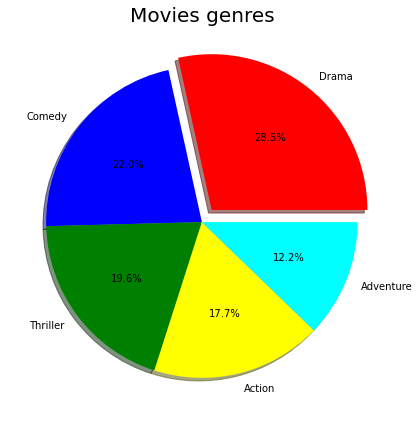

In [55]:
plt.figure(figsize=(12,6))
plt.pie(df_fg['extra_col'].head(),
       labels=df_fg['index'].head(),
       colors=['red', 'blue', 'green', 'yellow', 'cyan'],
       shadow=True, explode=[0.1,0,0,0,0],
       autopct='%1.1f%%');

plt.title('Movies genres', fontsize=20)

plt.tight_layout()

As shown these are the most frequent movies created and Drama movies are the most one

### Research Question 2
### (Is there a relation between the average of votes and budget ?)

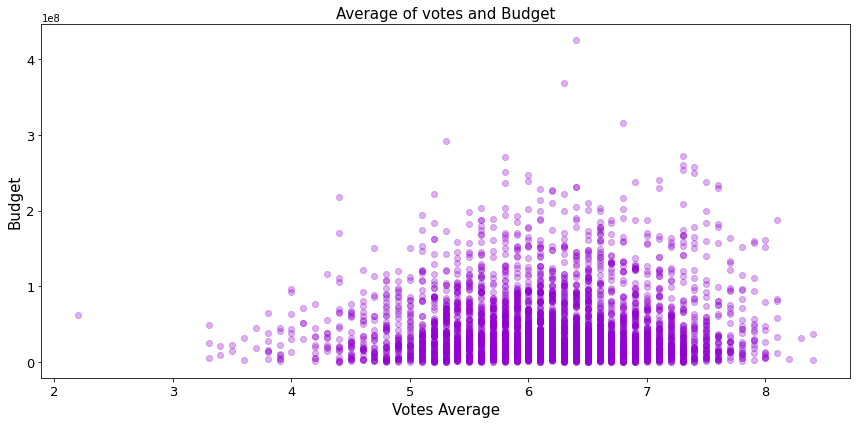

In [56]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df['vote_average'],
            y=df['budget'],
            alpha=0.3,
            color='darkviolet');

plt.title('Average of votes and Budget', fontsize=15)
plt.xlabel('Votes Average', fontsize=15)
plt.ylabel('Budget', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()

Here as the average of votes increases it seems to exist an increament too in the budget of the movie but, it starts to go down again at very high_rates as the shown plot to be left skewwed

### Research Question 3
### (Which year has the most number of movies released in ?)

In [57]:
df['release_year'].value_counts().to_frame().reset_index().head()

,index,release_year
0,2011,196
1,2013,179
2,2010,177
3,2009,170
4,2006,168


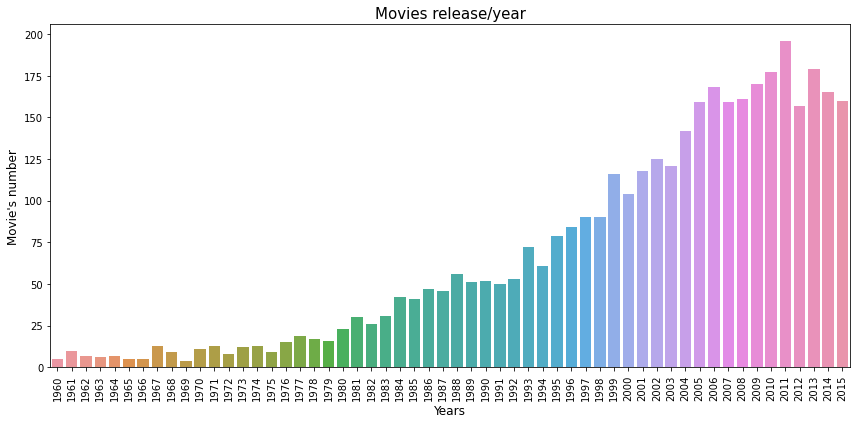

In [58]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['release_year']);

plt.title('Movies release/year', fontsize=15)
plt.xlabel('Years', fontsize=12)
plt.ylabel("Movie's number", fontsize=12)
plt.xticks(fontsize=10, rotation = 90);
plt.yticks(fontsize=10)

plt.tight_layout()

As shown the year with the most number of movies released in is '2014' which is equal to '635'

### Research Question 4
### (Is there a direct relationship between budget and revenue ?)

In [59]:
rand_samples = df.sample(n=2000, random_state=5)
rand_samples.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
8969,37165,4.180540,The Truman Show,"[Jim Carrey, Laura Linney, Noah Emmerich, Nata...",Peter Weir,103,"[Comedy, Drama]","[Paramount Pictures, Scott Rudin Productions]",1998-06-04,2392,7.6,1998,8.026173e+07,3.533097e+08
2672,9889,1.061903,Shallow Hal,"[Gwyneth Paltrow, Jack Black, Jason Alexander,...",Bobby Farrelly|Peter Farrelly,114,"[Comedy, Romance]",[Twentieth Century Fox Film Corporation],2001-11-01,394,5.5,2001,4.925952e+07,1.737259e+08
6320,7364,0.571693,Sahara,"[Matthew McConaughey, PenÃ©lope Cruz, Steve Za...",Breck Eisner,124,"[Action, Adventure, Comedy, Drama, Mystery]","[Paramount Pictures, Bristol Bay Productions, ...",2005-04-06,243,5.6,2005,1.451532e+08,1.331719e+08
9335,274,0.695385,The Silence of the Lambs,"[Jodie Foster, Anthony Hopkins, Scott Glenn, T...",Jonathan Demme,118,"[Crime, Drama, Thriller]","[Orion Pictures, Strong Heart/Demme Production]",1991-02-14,2679,7.9,1991,3.042076e+07,4.366867e+08
223,232572,0.602165,A Walk in the Woods,"[Robert Redford, Nick Nolte, Emma Thompson, Ni...",Ken Kwapis,104,"[Drama, Adventure, Comedy]","[Wildwood Enterprises, Route One Films]",2015-09-02,171,5.4,2015,7.359997e+06,3.311179e+07


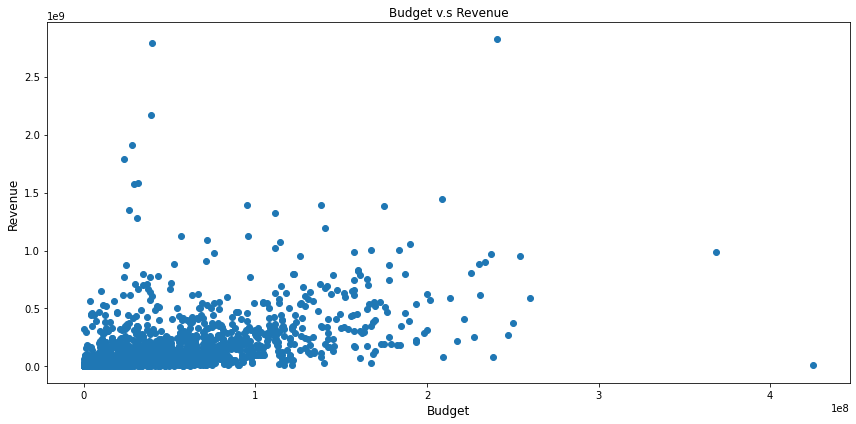

In [60]:
plt.figure(figsize=(12, 6))
plt.scatter(rand_samples['budget'], rand_samples['revenue']);

plt.title('Budget v.s Revenue')
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10)

plt.tight_layout()

It's not that quite visible in the data frame but, we can determine from it that as the budget increases the revenue increases too except in some outliers

### Research Question 5
### (Who are the most 5 actors that participated in the movies ?)

In [61]:
sample = df_ca['extra_col'].value_counts().to_frame().reset_index().head()
sample

,index,extra_col
0,Robert De Niro,52
1,Bruce Willis,46
2,Samuel L. Jackson,44
3,Nicolas Cage,43
4,Matt Damon,36


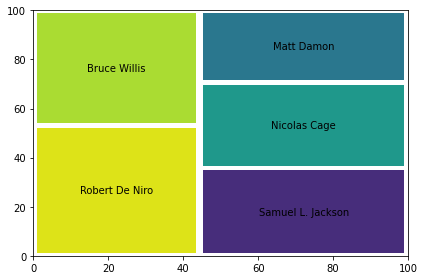

In [62]:
squarify.plot(sizes=sample['extra_col'],
              label=sample['index'],
              pad=True)

plt.tight_layout()

As shown the one with the largest area is the most actor that participated in most number of movies and so on.

<a id='conclusions'></a>
## Conclusions

> After cleaning the data, dropping null values and outliers, splitting the data into 3 extra separated dataframes and making it ready to work on it

> I asked my 5 questions and answerd them using the pandas library searching and accessing techniques and also visualizing the data I searched for.

> ### Question (1): 
What are the most 5 frequent genres of movies respectively ?

> They are Drama (1729) movie, Comedy (1335) movie, Thriller (1094) movie, Action (1076) movie and Adventure (743) movie.

> ### Question (2): 
Is there a relation between the average of votes and budget ?

> Yes where the average of votes increases it seems to exist an increament too in the budget of the movie but, it starts to go down again at very high_rates as the shown plot to be left skewwed and it's a direct relationship.

> ### Question (3): 
Which year has the most number of movies released in ?

> It's year '2011' with (196) movie.

> ### Question (4): 
Is there a direct relationship between budget and revenue ?

> Actually yes, there is a slight direct relationship between the budget of the movie and it's revenue but, except some outliers.

> ### Question (5): 
Who are the most 10 actors that participated in the movies ?

> They are 'Robert De Niro' with (52) movie, 'Bruce Willis' with (46) movie, 'Smauel L. Jackson' with (44) movie, 'Nicolas Cage' with (43) movie, 'Matt Damon' with (36).

### Limitations

> In the data I found some problems also complicated ones to be solved.

> 1st: The null values, Data contains alot of null values in which were going to make searching and accessing some rows having missing values make wrong analysis.

> 2nd: Some values of the budget and the revenue where outliers for example alot of them were equal to 0 which makes the analysis and the visualization for some random samples goes wrong and non-accurate plots and numerical values for averages.

> 3rd: Data type of the release date needed to be adjusted as a Datetime data type in order to facilitate the work and the anaylsis with it ... Easy access to years, months and days>

> 4th: Finally the production companies, the cast and the genres were supposed to be a multi valued attribute but, it was separeted by '|' in each value for each row and it was Hard if I needed to access such an Actor or a production company or a genre of a movie separtly so, I had to split them up in aside Dataframes for each of these multi valued attributes